In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from warnings import filterwarnings

In [2]:
df=pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


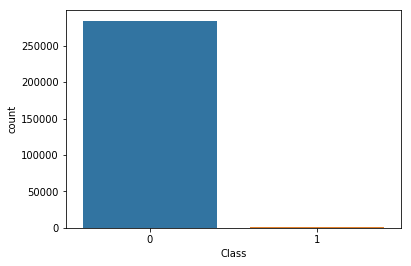

In [3]:
sns.countplot(x='Class',data=df)

In [6]:
#as we see we have a really high test score
#We got an accuracy score of 99.8% — And without even training a model! 
#Standard ML techniques such as Decision Tree and Logistic Regression have a bias towards the majority class, and they tend to ignore the minority class. They tend only to predict the majority class, hence, having major misclassification of the minority class in comparison with the majority class.
import pandas as pd 
import numpy as np 
import seaborn as sns 
from sklearn.preprocessing import StandardScaler 
from imblearn.over_sampling import RandomOverSampler, SMOTE 

In [8]:
from sklearn.preprocessing import StandardScaler
df['normAmount'] = StandardScaler().fit_transform(df[['Amount']])
df = df.drop(['Time', 'Amount'], axis=1)
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,normAmount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403


In [13]:
x = df.drop('Class',axis=1) 
y = df['Class'] 

In [14]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [15]:
sm = SMOTE(random_state = 0) 
x_new,y_new = sm.fit_resample(x_train,y_train)    
x_new = pd.DataFrame(x_new) 
y_new = pd.DataFrame(y_new) 

In [16]:
print("After SMOTE Over Sampling Of Minor Class Total Samples are :", len(y_new)) 
print('Class 0        :', round(y_new[0].value_counts()[0] 
                 /len(y_new) * 100, 2), '% of the dataset') 
   
print('Class 1(Fraud) :', round(y_new[0].value_counts()[1] 
                 /len(y_new) * 100, 2), '% of the dataset') 

After SMOTE Over Sampling Of Minor Class Total Samples are : 454908
Class 0        : 50.0 % of the dataset
Class 1(Fraud) : 50.0 % of the dataset


In [17]:
from sklearn.tree import DecisionTreeClassifier

In [18]:
clf=DecisionTreeClassifier(max_depth=6)

In [19]:
clf.fit(x_new,y_new)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=6,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [20]:
pred=clf.predict(x_test)

In [21]:
from sklearn.metrics import classification_report

In [22]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98     56861
           1       0.04      0.91      0.08       101

    accuracy                           0.96     56962
   macro avg       0.52      0.94      0.53     56962
weighted avg       1.00      0.96      0.98     56962



In [23]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,pred))

[[54705  2156]
 [    9    92]]


In [29]:
from sklearn.metrics import f1_score,recall_score,roc_auc_score
print(roc_auc_score(y_test,pred))

0.9364870316897502


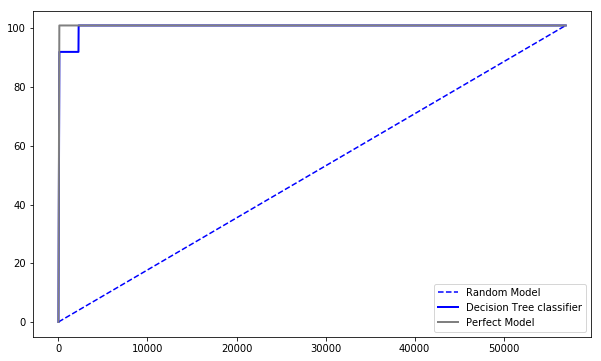

In [32]:
#CAP curve
import matplotlib.pyplot as plt 
import numpy as np 
  
# length of the test data 
total = len(y_test) 
  
# Counting '1' labels in test data 
one_count = np.sum(y_test) 
  
# counting '0' lables in test data  
zero_count = total - one_count 
  
plt.figure(figsize = (10, 6)) 
  
# x-axis ranges from 0 to total people contacted  
# y-axis ranges from 0 to the total positive outcomes. 
  
plt.plot([0, total], [0, one_count], c = 'b',  
         linestyle = '--', label = 'Random Model')
lm = [y for _, y in sorted(zip(pred, y_test), reverse = True)] 
x = np.arange(0, total + 1) 
y = np.append([0], np.cumsum(lm)) 
plt.plot(x, y, c = 'b', label = 'Decision Tree classifier', linewidth = 2) 
plt.plot([0, one_count, total], [0, one_count, one_count], 
         c = 'grey', linewidth = 2, label = 'Perfect Model') 
plt.legend()

In [36]:
from sklearn.model_selection import GridSearchCV
clf2=DecisionTreeClassifier()
parameters = {
    'max_depth':[2,3,4,5,6,7,8,9,10]
             }
clf1 = GridSearchCV(clf2, parameters)
clf1.fit(x_new, y_new)

C:\Users\User\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10]},
             pre_dispatch='2*n_jobs', refit=True, return_train

In [37]:
clf1.best_params_

{'max_depth': 10}

In [38]:
clf1.best_estimator_

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [39]:
clf_new=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [40]:
clf_new.fit(x_new,y_new)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [44]:
clf_new.predict(x_test)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [45]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,pred))

[[54705  2156]
 [    9    92]]


In [46]:
from sklearn.metrics import f1_score,recall_score,roc_auc_score
print(roc_auc_score(y_test,pred))

0.9364870316897502
